In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
from pathlib import Path
from scipy import stats
from statannot import add_stat_annotation

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}
matplotlib.rc('font', **font)

In [3]:
df = pd.DataFrame()
for root, dirs, files in os.walk('.'):
    if '.txt' in files[0]:
        folder = (root[2:])
        for file in files:
            file_df = pd.read_csv(Path(root+'/'+file))
            #extract timepoint with some silly string manipulation
            time = int(file[6:-7])
            file_df = file_df.dropna(axis=0, how='any')
            file_df['time'] = [time]*file_df.shape[0]
            file_df['folder'] = [folder]*file_df.shape[0]
            file_df['count'] = [file_df.shape[0]]*file_df.shape[0]
            df = pd.concat([df, file_df])
folders = df['folder'].unique()

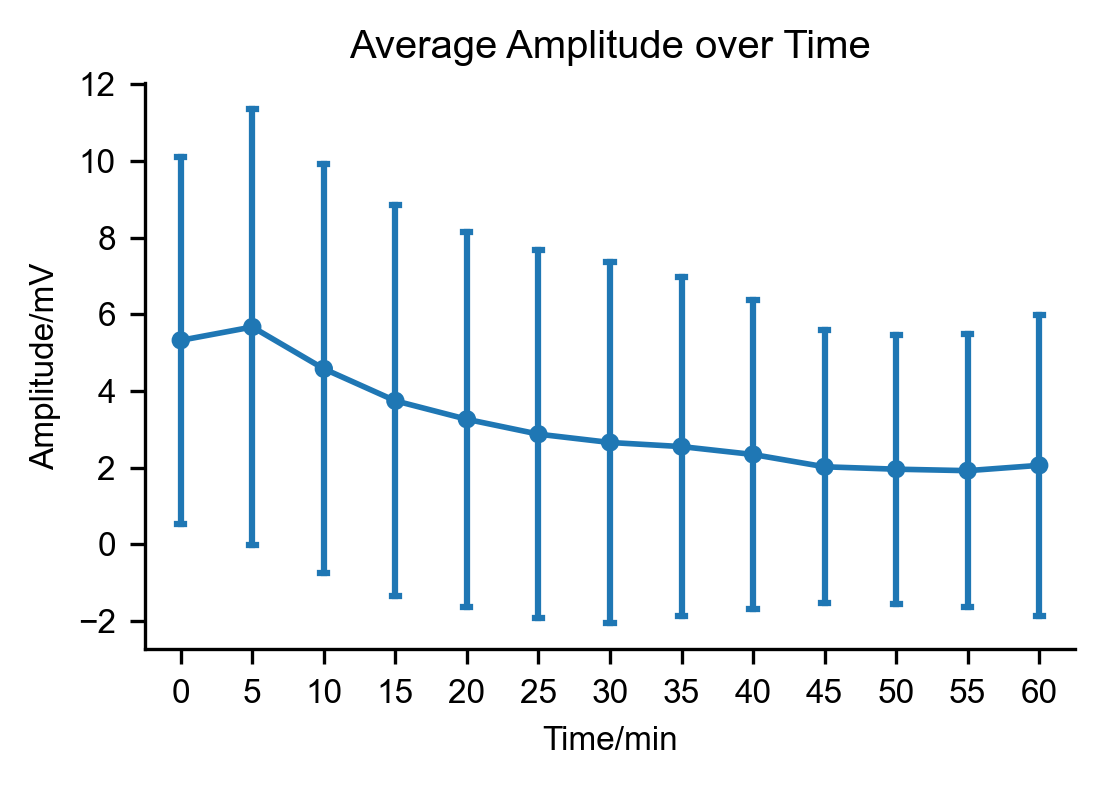

In [4]:
fig, ax = plt.subplots(figsize=(4,2.5), dpi=300)
sns.pointplot(data = df, x = 'time', y = 'PP_Amp_avg', ci='sd', scale=0.5, errwidth=1.5, capsize=0.1)
sns.despine()
ax.set_xlabel('Time/min')
ax.set_ylabel('Amplitude/mV')
ax.set_title('Average Amplitude over Time')
fig.savefig('amp_time.png')

Text(0.5, 1.0, 'Average Amplitude over Time')

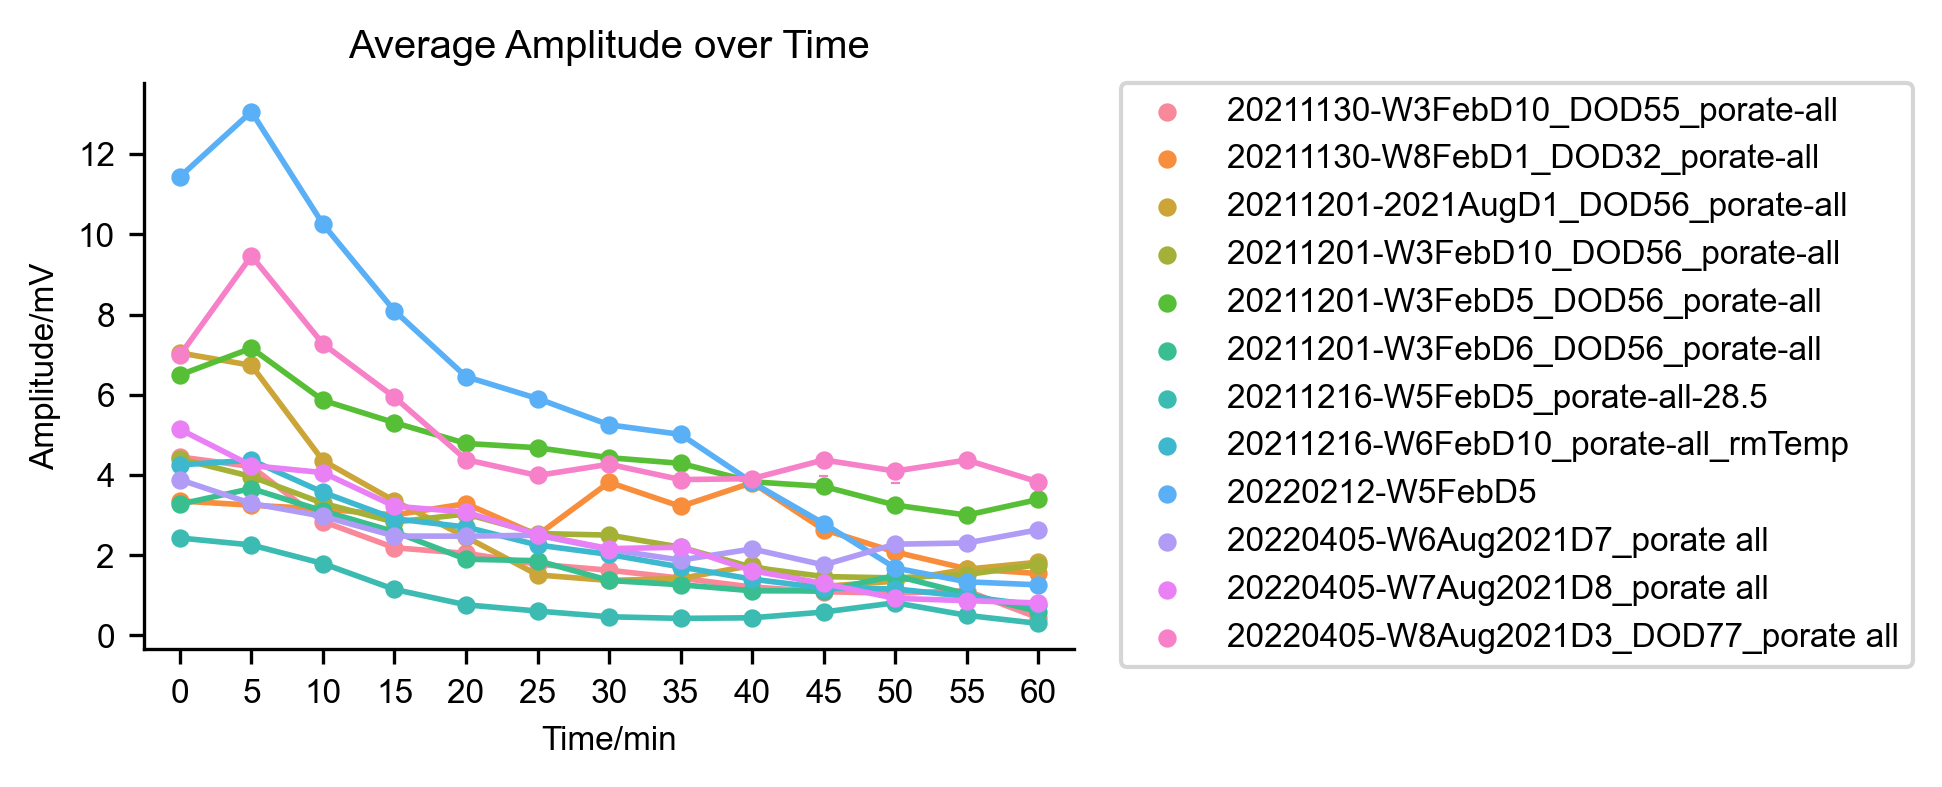

In [8]:
fig, ax = plt.subplots(figsize=(4,2.5), dpi=300)
sns.pointplot(data = df, x = 'time', y = 'PP_Amp_avg',hue = 'folder', ci=0 ,scale=0.5, errwidth=0.5, capsize=0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
sns.despine()
ax.set_xlabel('Time/min')
ax.set_ylabel('Amplitude/mV')
ax.set_title('Average Amplitude over Time')



No handles with labels found to put in legend.
No handles with labels found to put in legend.


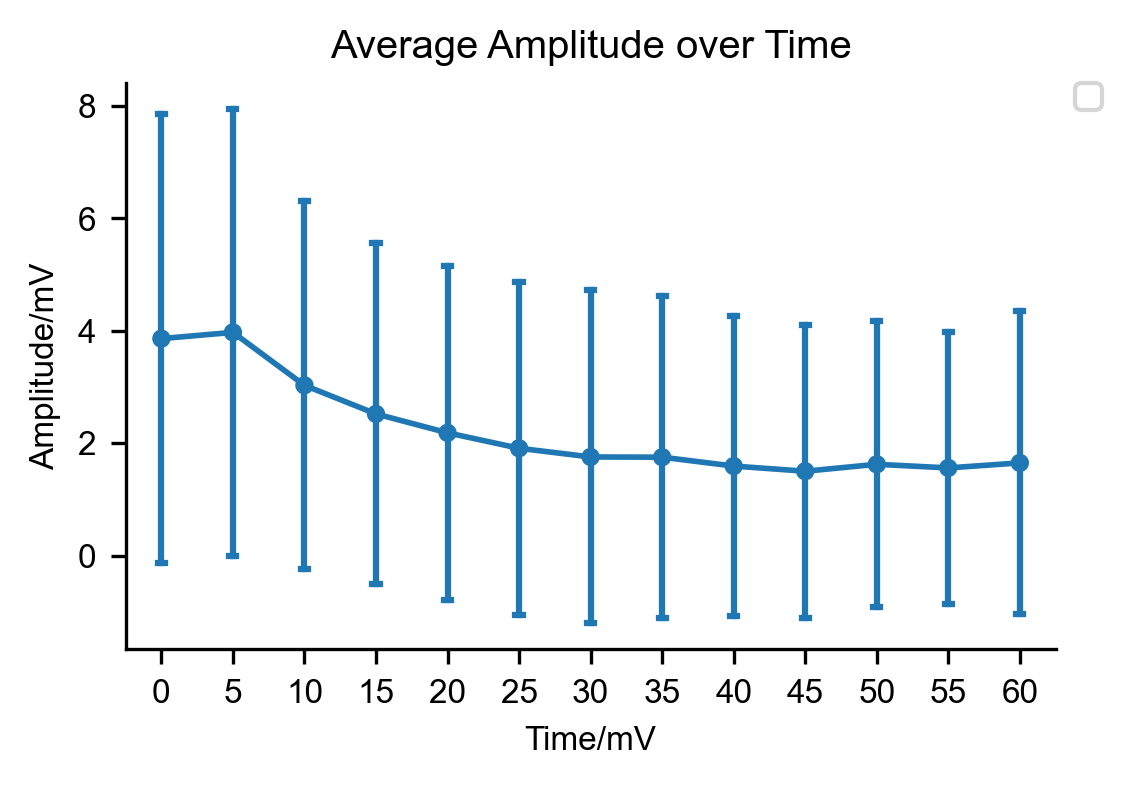

In [11]:
# exclude 20211130-W8FebD1_DOD32_porate-all
exclude_df = df[df['folder'] != '20211130-W8FebD1_DOD32_porate-all']
fig, ax = plt.subplots(figsize=(4,2.5), dpi=300)
sns.pointplot(data = exclude_df, x = 'time', y = 'PP_Amp_avg', ci='sd', scale=0.5, errwidth=1.5, capsize=0.1)
sns.despine()
ax.set_xlabel('Time/mV')
ax.set_ylabel('Amplitude/mV')
ax.set_title('Average Amplitude over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0)
#fig.savefig('amp_time_exclude.png')

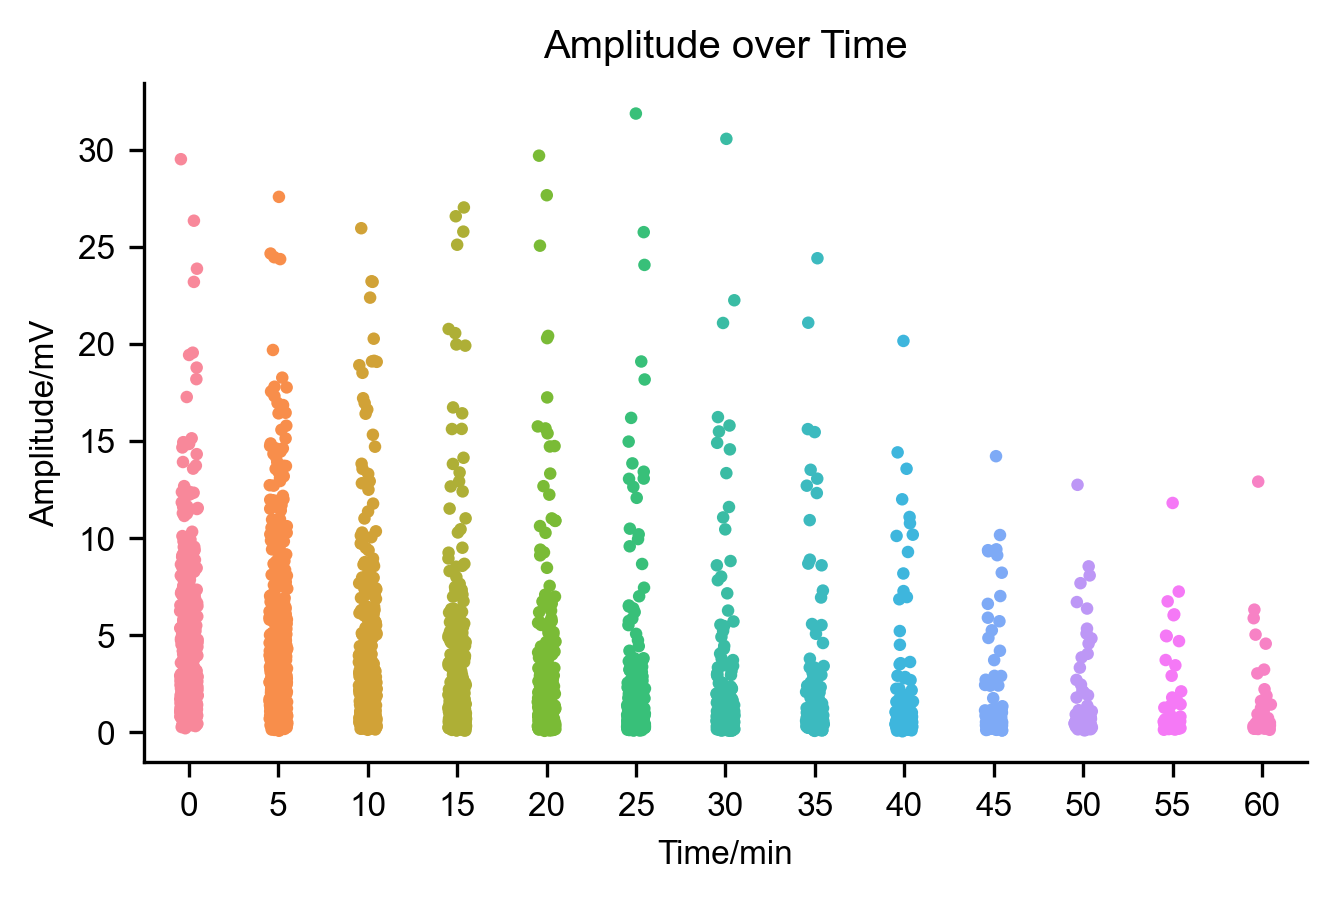

In [27]:
fig, ax = plt.subplots(figsize=(5,3), dpi=300)
sns.stripplot(data = df, x = 'time', y = 'SP_Amp_avg', size=3)
sns.despine()
ax.set_xlabel('Time/min')
ax.set_ylabel('Amplitude/mV')
ax.set_title('Amplitude over Time')
fig.savefig('amp_time_scatter.png')

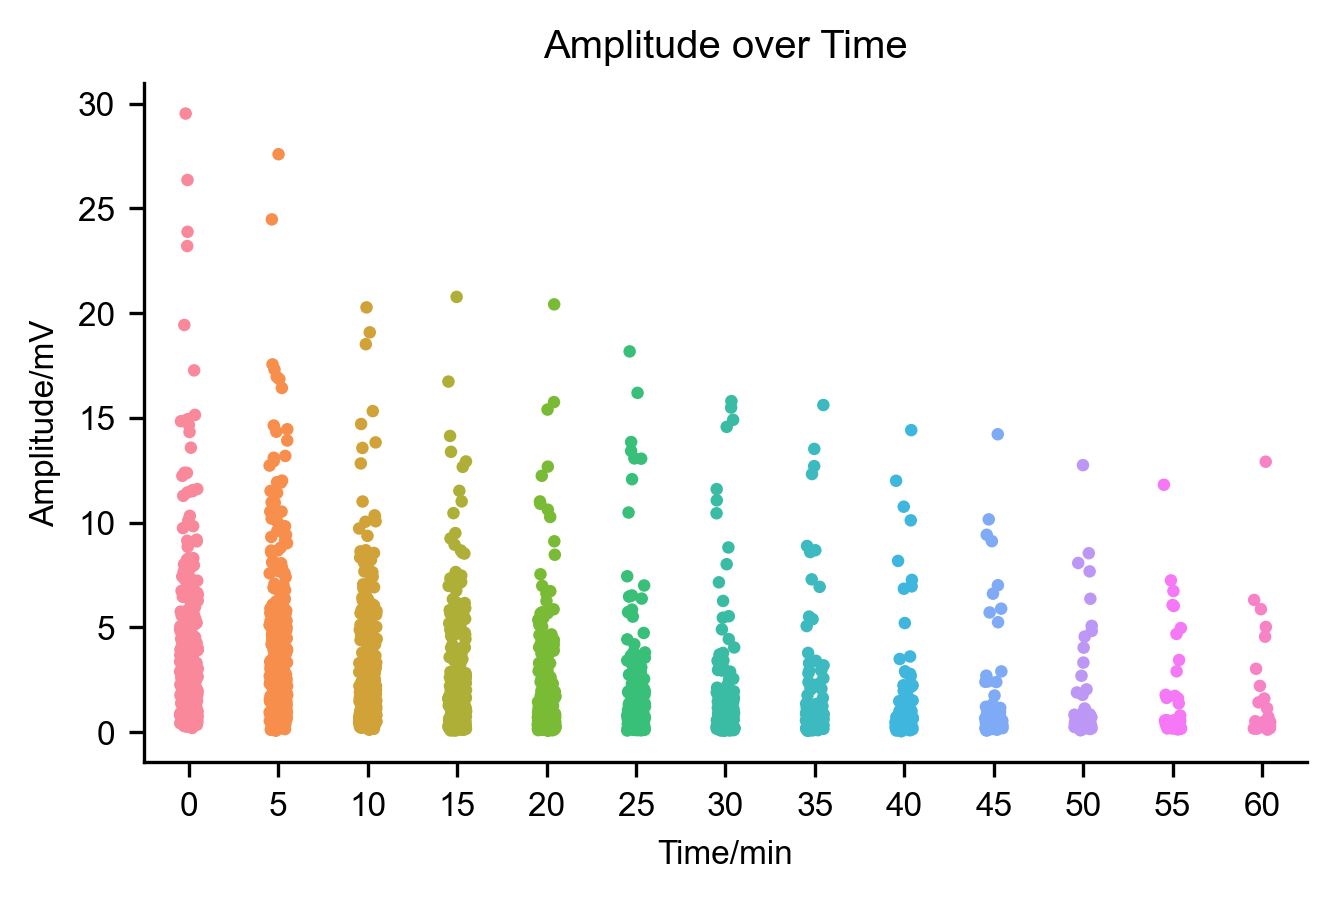

In [59]:
fig, ax = plt.subplots(figsize=(5,3), dpi=300)
sns.stripplot(data = exclude_df, x = 'time', y = 'SP_Amp_avg', size=3)
ax.set_xlabel('Time/min')
ax.set_ylabel('Amplitude/mV')
sns.despine()
ax.set_title('Amplitude over Time')
fig.savefig('amp_time_scatter_exclude.png')

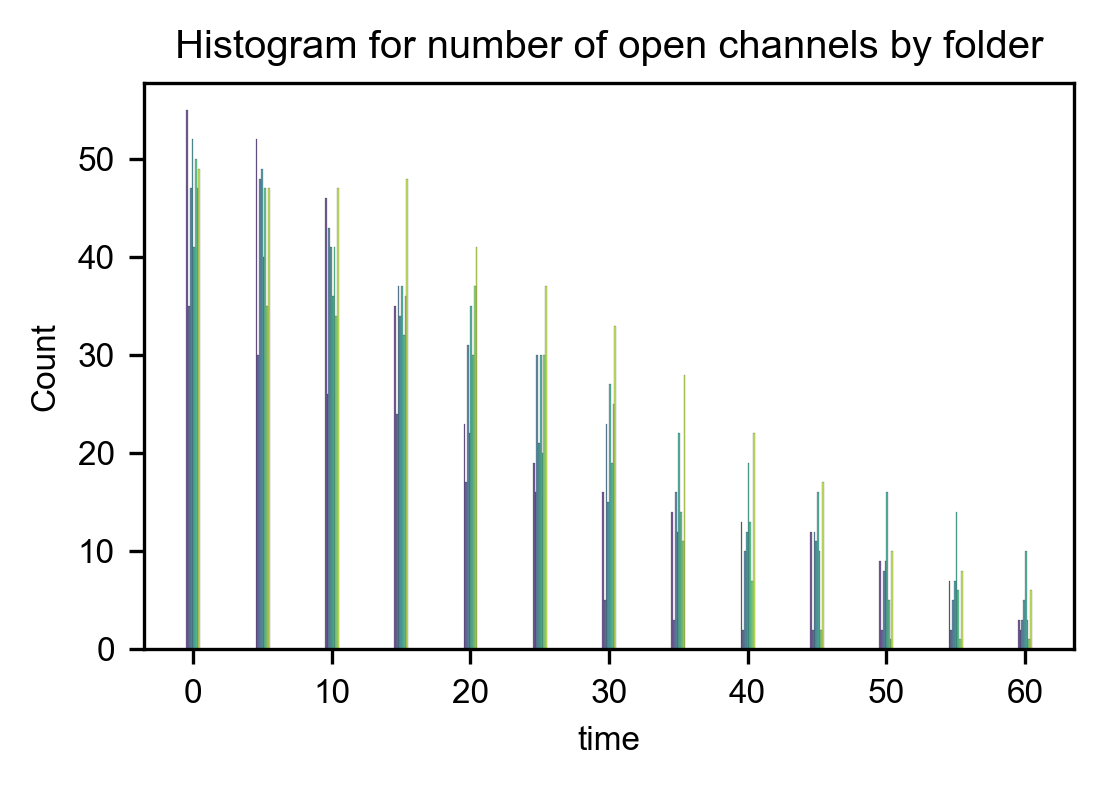

In [60]:
fig, ax = plt.subplots(figsize=(4,2.5), dpi=300)
sns.histplot(data=df, x='time', hue='folder', discrete=1, palette='viridis', multiple='dodge')
ax.get_legend().remove()
ax.set_title('Histogram for number of open channels by folder')
fig.savefig('channels_hist.png')

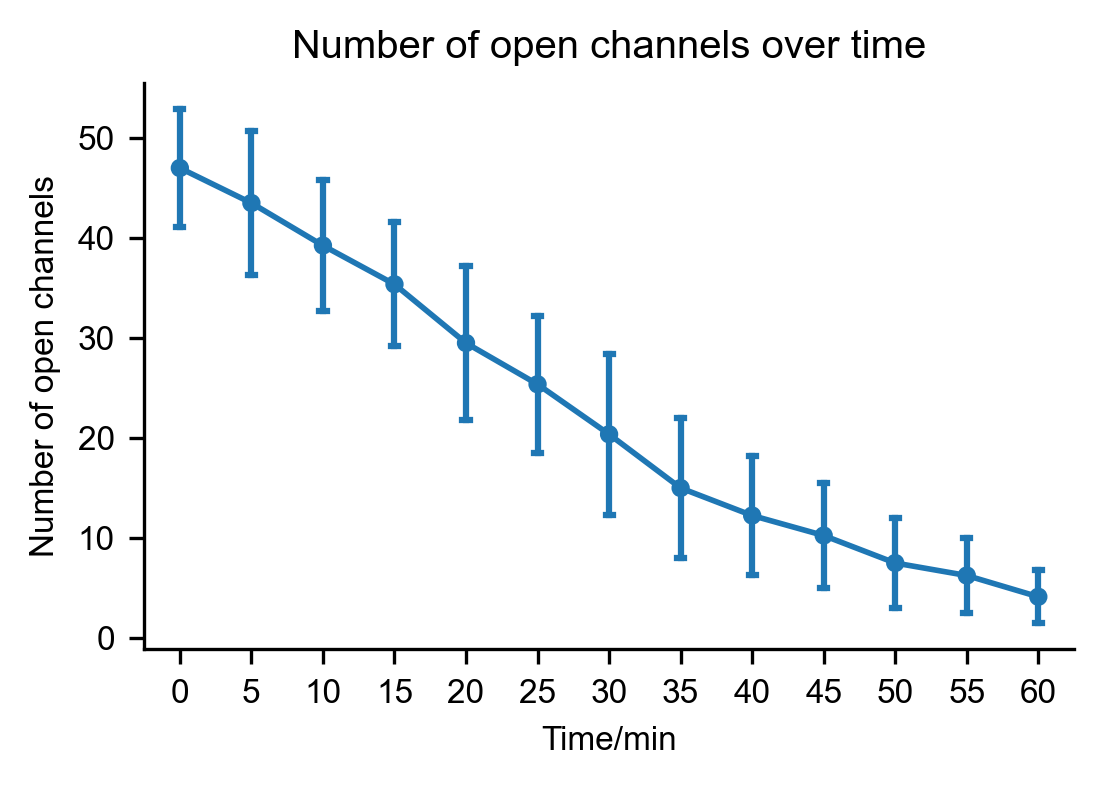

In [28]:
count_df = pd.read_csv('channels_open.csv')
order = [0,5,10,15,20,25,30,35,40,45,50,55,60]
fig, ax = plt.subplots(figsize=(4,2.5), dpi=300)
sns.pointplot(data = count_df, x = 'time', y = 'num_open', ci='sd', order=order, scale=0.5, errwidth=1.5, capsize=0.1, zorder=2)
sns.despine()
ax.set_xlabel('Time/min')
ax.set_ylabel('Number of open channels')
ax.set_title('Number of open channels over time')
fig.savefig('open_channels.png')

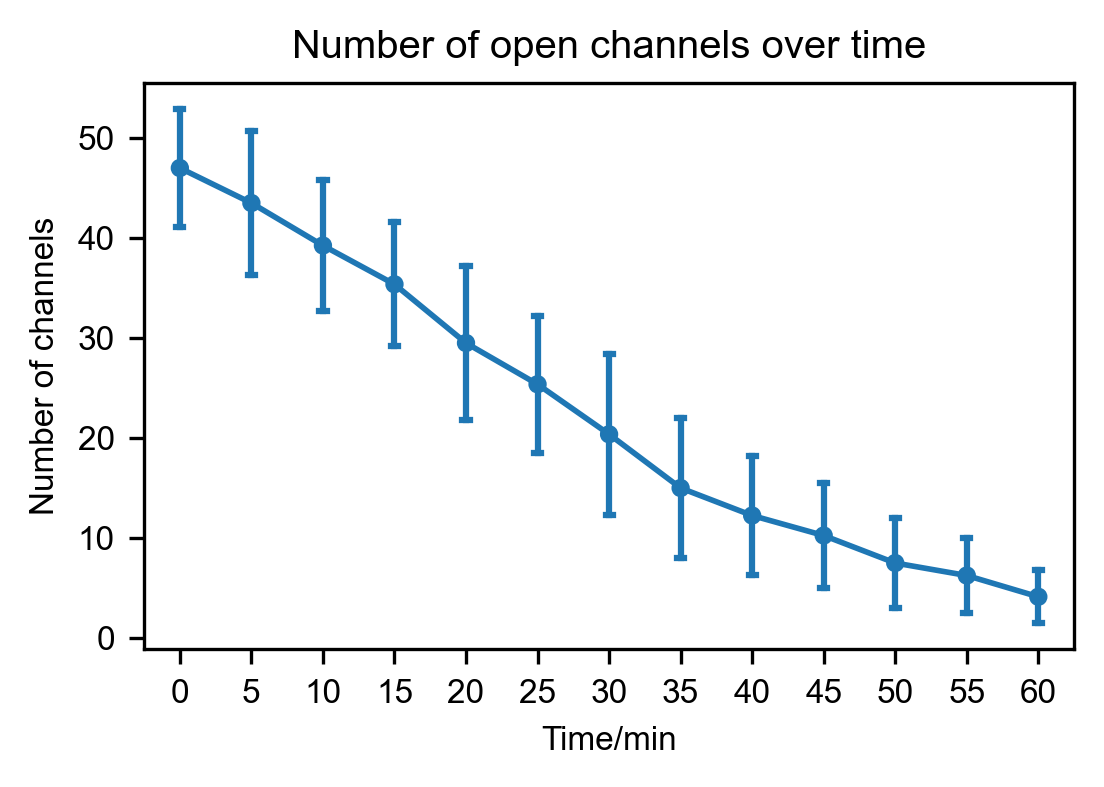

In [66]:
# excluding 20211130-W8FebD1_DOD32_porate-all
exclude = count_df[count_df['file_name'] != '20211130-W8FebD1_DOD32_porate-all']
fig, ax = plt.subplots(figsize=(4,2.5), dpi=300)
sns.pointplot(data = count_df, x = 'time', y = 'num_open', ci='sd', scale=0.5, errwidth=1.5, capsize=0.1)
ax.set_xlabel('Time/min')
ax.set_ylabel('Number of channels')
ax.set_title('Number of open channels over time')
fig.savefig('open_channels_exclude.png')

In [23]:
exclude_df.to_csv('all_data_excluding20211130-W8FebD1_DOD32_porate-all.csv')
df.to_csv('all_data.csv')

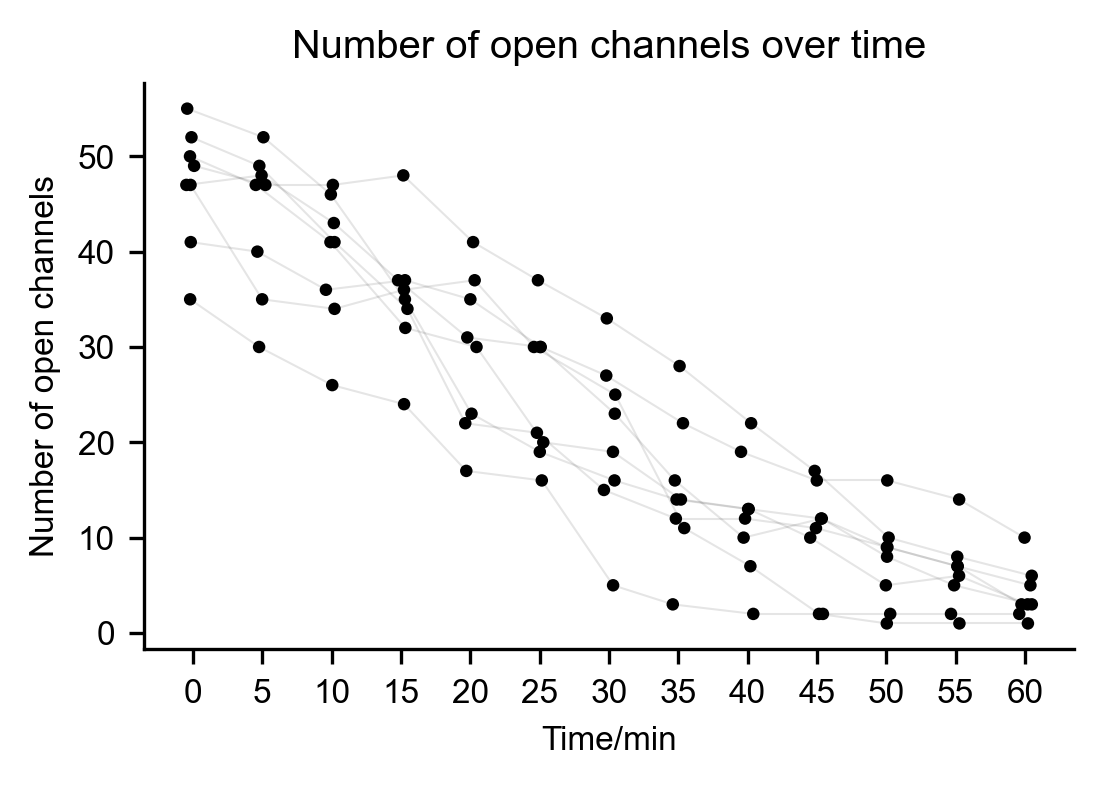

In [29]:
order = [0,5,10,15,20,25,30,35,40,45,50,55,60]
fig, ax = plt.subplots(figsize=(4,2.5), dpi=300)
sns.stripplot(data = count_df, x = 'time', y = 'num_open', size=3, order=order, zorder=1, color='black')
locs=[]
for i in range(len(order)):
        loc = ax.get_children()[i].get_offsets()
        locs.append(loc)
for i in range(locs[0].shape[0]):
    for j in range(len(order)-1):
        x = [locs[j][i, 0], locs[j+1][i, 0]]
        y = [locs[j][i, 1], locs[j+1][i, 1]]
        ax.plot(x, y, color="black", linewidth=0.5, alpha=0.1)
sns.despine()
ax.set_xlabel('Time/min')
ax.set_ylabel('Number of open channels')
ax.set_title('Number of open channels over time')
fig.savefig('open_channels_scatter.png',bbox_inches='tight')

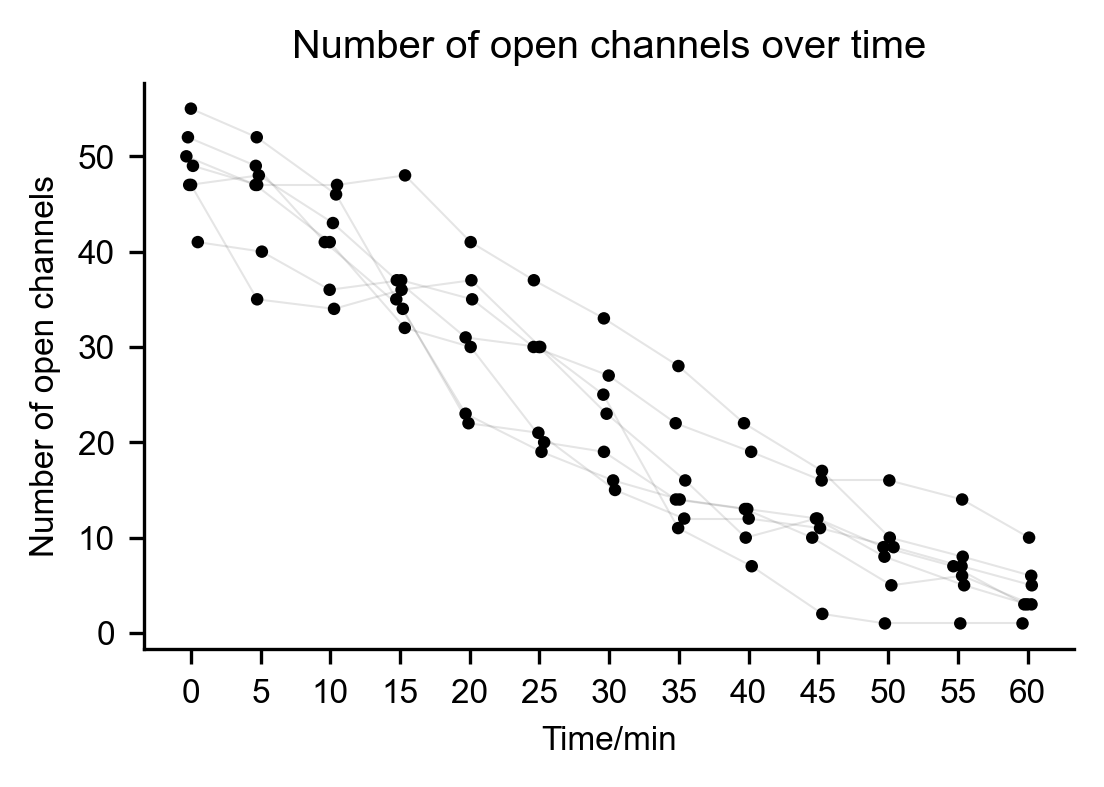

In [68]:
fig, ax = plt.subplots(figsize=(4,2.5), dpi=300)
sns.stripplot(data = exclude, x = 'time', y = 'num_open', size=3, order=order, zorder=1, color='black')
locs=[]
for i in range(len(order)):
        loc = ax.get_children()[i].get_offsets()
        locs.append(loc)
for i in range(locs[0].shape[0]):
    for j in range(len(order)-1):
        x = [locs[j][i, 0], locs[j+1][i, 0]]
        y = [locs[j][i, 1], locs[j+1][i, 1]]
        ax.plot(x, y, color="black", linewidth=0.5, alpha=0.1)
sns.despine()
ax.set_xlabel('Time/min')
ax.set_ylabel('Number of open channels')
ax.set_title('Number of open channels over time')
fig.savefig('open_channels_scatter_exclude.png',bbox_inches='tight')

In [ ]:
t0_amp = exclude_df[exclude_df['time'] == 0]
print(np.mean(t0_amp['PP_Amp_avg']))
print(np.std(t0_amp['PP_Amp_avg']))
print(np.median(t0_amp['PP_Amp_avg']))
print(max(t0_amp['PP_Amp_avg']))

In [ ]:
for f in df['folder'].unique():
    print(f)
    c = df[df['folder'] == f]
    PP_amp = c[c['time'] == 0]['PP_Amp_avg']
    SP_amp = c[c['time'] == 0]['SP_Amp_avg']
    print (np.mean(PP_amp), np.std(PP_amp), max(PP_amp), np.median(PP_amp))
    print (np.mean(SP_amp), np.std(SP_amp), max(SP_amp), np.median(SP_amp))